# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [102]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [103]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [104]:
city_json = {'City':[],'Cloudiness':[],'Country':[],'Date':[],'Humidity':[],'Lat':[],'Lng':[],'Max Temp':[],'Wind Speed':[]}
url = 'https://api.openweathermap.org/data/2.5/weather?'
query = 'q='
api_key = '8a1863c39509c4a180c7183e046c2484'
key_ = '&APPID=' + api_key

counter = 1
print('Beginning Data Retrieval')
print('-----------------------------')
for city in cities:
    response = requests.get(url + query + city + '&units=metric' + key_).json()
    try:
        city_json['City'].append(response['name'])
        city_json['Cloudiness'].append(response['clouds']['all'])
        city_json['Country'].append(response['sys']['country'])
        city_json['Date'].append(response['dt'])
        city_json['Humidity'].append(response['main']['humidity'])
        city_json['Lat'].append(response['coord']['lat'])
        city_json['Lng'].append(response['coord']['lon'])
        city_json['Max Temp'].append(response['main']['temp_max'])
        city_json['Wind Speed'].append(response['wind']['speed'])
        print('Processing Record ' + str(counter) + ' | ' + response['name'])
        counter +=1
    except:
        print('City not found. Skipping...')

#city_json
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 | Saint Anthony
Processing Record 2 | Beringovskiy
Processing Record 3 | Ushuaia
Processing Record 4 | Rikitea
Processing Record 5 | Port Hedland
Processing Record 6 | Katsuura
Processing Record 7 | Hobart
Processing Record 8 | Zhanaozen
Processing Record 9 | Kapaa
City not found. Skipping...
Processing Record 10 | Rafsanjan
Processing Record 11 | Dingle
Processing Record 12 | Cockburn Town
Processing Record 13 | Talnakh
Processing Record 14 | Yabelo
Processing Record 15 | Punta Arenas
City not found. Skipping...
City not found. Skipping...
Processing Record 16 | Roanoke Rapids
Processing Record 17 | Sao Filipe
Processing Record 18 | Shaowu
Processing Record 19 | Albany
Processing Record 20 | Maningrida
Processing Record 21 | Portknockie
Processing Record 22 | Airai
City not found. Skipping...
Processing Record 23 | Busselton
City not found. Skipping...
Processing Record 24 | Salihli
Processing Record 25 | Salal

Processing Record 218 | Todos Santos
Processing Record 219 | Westerland
Processing Record 220 | Nova Granada
Processing Record 221 | Skelleftea
Processing Record 222 | Baykit
City not found. Skipping...
Processing Record 223 | Jerome
Processing Record 224 | Pacific Grove
Processing Record 225 | Camacha
City not found. Skipping...
Processing Record 226 | Bend
Processing Record 227 | Batemans Bay
Processing Record 228 | Vozuca
Processing Record 229 | Broken Hill
Processing Record 230 | Port Blair
Processing Record 231 | Valdemarpils
City not found. Skipping...
City not found. Skipping...
Processing Record 232 | Karratha
Processing Record 233 | Axim
Processing Record 234 | Wanning
Processing Record 235 | Kutum
Processing Record 236 | Khomeyn
Processing Record 237 | Yarmouth
Processing Record 238 | Pochutla
Processing Record 239 | Meulaboh
Processing Record 240 | Pevek
Processing Record 241 | Fushun
Processing Record 242 | Soverato
City not found. Skipping...
Processing Record 243 | Wamba


Processing Record 448 | Sevierville
Processing Record 449 | Dalvik
Processing Record 450 | Te Anau
Processing Record 451 | Nemuro
Processing Record 452 | Byron Bay
Processing Record 453 | Wewak
Processing Record 454 | Aykhal
Processing Record 455 | Solnechnyy
Processing Record 456 | Yate
Processing Record 457 | Kamaishi
Processing Record 458 | Lakatoro
Processing Record 459 | Candido Mendes
Processing Record 460 | Roebourne
Processing Record 461 | Ambon
Processing Record 462 | Mayumba
Processing Record 463 | Port-Cartier
Processing Record 464 | Bubaque
Processing Record 465 | Okoneshnikovo
Processing Record 466 | Ndola
Processing Record 467 | Haines Junction
Processing Record 468 | Hailar
City not found. Skipping...
Processing Record 469 | Hackettstown
Processing Record 470 | High Level
Processing Record 471 | Werda
Processing Record 472 | Marystown
Processing Record 473 | Dhidhdhoo
Processing Record 474 | Marsh Harbour
Processing Record 475 | Muisne
Processing Record 476 | Mount Gambi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [105]:
data_frame = pd.DataFrame(city_json)
data_frame.to_csv('City_Data.csv')
data_frame.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

In [106]:
data_frame.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint Anthony,90,US,1547184660,92,43.97,-111.68,0.00,1.22
1,Beringovskiy,64,RU,1547185444,92,63.05,179.32,-9.20,9.92
2,Ushuaia,40,AR,1547182800,47,-54.81,-68.31,14.00,8.20
3,Rikitea,100,PF,1547185446,100,-23.12,-134.97,25.01,7.97
4,Port Hedland,0,AU,1547182800,63,-20.31,118.58,34.00,8.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

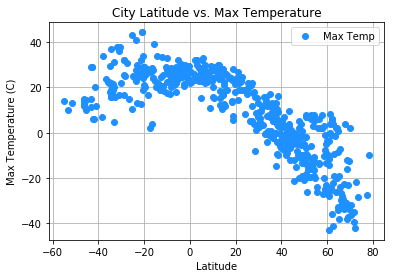

In [107]:
ax = data_frame.plot(grid=True,y='Max Temp',x='Lat',lw=0,c='dodgerblue', marker='o', title='City Latitude vs. Max Temperature')
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (C)")
plt.show()

#### Latitude vs. Humidity Plot

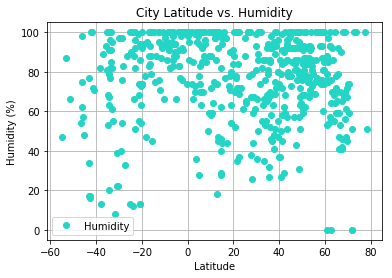

In [108]:
ax = data_frame.plot(grid=True,y='Humidity',x='Lat',lw=0,c='#23D5C5', marker='o', title='City Latitude vs. Humidity')
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
plt.show()

#### Latitude vs. Cloudiness Plot

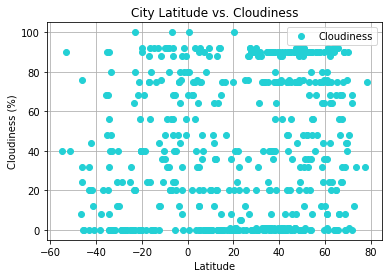

In [109]:
ax = data_frame.plot(grid=True,y='Cloudiness',x='Lat',lw=0,c='#23D0D5', marker='o', title='City Latitude vs. Cloudiness')
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
plt.show()

#### Latitude vs. Wind Speed Plot

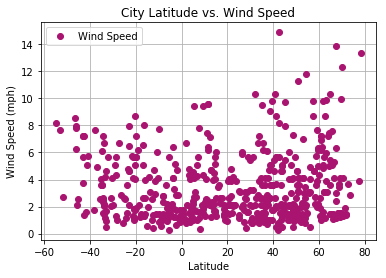

In [110]:
ax = data_frame.plot(grid=True,y='Wind Speed',x='Lat',lw=0,c='#A91470', marker='o', title='City Latitude vs. Wind Speed')
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
plt.show()